# **Analyse de sentiments vis à vis d'Emmanuel Macron au cours de l'année 2022.**
**Projet Python - 2A ENSAE**

TCHAZOU KAMWA Fabrice Nathan, DALBARADE Raphaël, LARGITTE Pierre-Eugène

# Introduction

+ **Présentation et Objectif** : On cherche dans ce projet à mener une analyse de sentiments sur Emmanuel Macron. Plus précisément d'être capable de prédire son niveau de popularité en France au cours l'année 2022. Pour mener ce projet à bien on a décidé d'utiliser des données issues de Twitter (des tweets) et d'en extirper le sentiment vis à vis d'Emmanuel Macron. Le but final étant de comparer nos modèles de prédiction de la côte de popularité du président avec des modèles existant déjà et publiés dans de grands journaux. 

+ **Plan du projet** : Le projet est diviser en cinq parties; Première étape :On extrait tout d'abord les données (voir la section *scrapping*). La deuxième étape est celle ou l'on nétoie les données (section *nettoyage*) pour les traiter. On cré alors des features liés au sentiment du tweet et à ses caractéristiques (exemple : combien y a-t-il de points d'exclamation). Pour créer les features liés au sentiments du tweet on utilisera les modèles issues de Vader et Textblob qu'on pourra comparer par la suite. Lors de la troisième étape on commence à analyser les données à travers des statistiques descriptives en utilisant les packages Textblob et Vader. Lors de la quatrième étape, on introduira un nouveau modèle. Pour finir, on utilisera un modèle de machinelearning pour prédire les sentiments vis à vis d'Emmanuel Macron.

In [1]:
#!pip install textblob

In [2]:
#!pip install afinn

In [3]:
#!pip install wordcloud

In [4]:
#!pip install textblob-fr

In [5]:
#!pip install plotly

In [6]:
#!pip install spacy

In [7]:
#!pip install gensim

In [8]:
#!pip install vaderSentiment-fr

In [9]:
#!pip install python-Levenshtein

In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import plotly
import re
import matplotlib
import plotly.express as px
import plotly.express as px
import seaborn as sns
import datetime
from PIL import Image
from afinn import Afinn
from datetime import *
from wordcloud import WordCloud
from textblob import TextBlob
from textblob import TextBlob, Blobber
from textblob_fr import PatternTagger, PatternAnalyzer
import nltk
from nltk.corpus import stopwords
from random import random, seed
import sklearn
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import statsmodels.api as sm
import scipy
from scipy.stats import chi2_contingency as chi2_contingency
import gensim.corpora as corpora 
from pprint import pprint
import gensim.models
from vaderSentiment_fr.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
#Récupération de la dataframe une fois nettoyée
def recup_clean():
  return pd.read_csv("Nettoyage/df_clean.csv")
df=recup_clean()

In [12]:
df.head()

Datetime  \
0  2022-01-01 00:00:14+00:00   
1  2022-01-01 00:01:07+00:00   
2  2022-01-01 00:01:16+00:00   
3  2022-01-01 00:01:29+00:00   
4  2022-01-01 00:01:51+00:00   

                                               Tweet             User  like  \
0  @EmmanuelMacron Il faut aussi autoriser les tr...     Colombe75010     6   
1  @EmmanuelMacron dixit celui qui ne vit qu’en o...       Tivinn2017     1   
2  @EmmanuelMacron @Enthoven_R On voit l'efficaci...    DeadMoneyTeam     1   
3  @EmmanuelMacron @BrunoLeMaire bonne année mons...  christine_peres     1   
4  @EmmanuelMacron On s'en moque que la France pr...    Bakounine2017     1   

   retweet Month        Date  \
0        0   Jan  2022-01-01   
1        0   Jan  2022-01-01   
2        0   Jan  2022-01-01   
3        0   Jan  2022-01-01   
4        0   Jan  2022-01-01   

                                            sl_clean  type  
0  il aussi autoriser traitement curatif investir...  True  
1                        dixit celui opposer Bye bye  True  
2                        on efficacité effectivement  True  
3          bon année souhaite cœur prochain élection  True  
4  on moque prendre présidence certains elu prési...  True

# I-Création des features

In [13]:
#Fonction comptant le nombre de hashtags présents dans le tweet
def nbre_htag(text):
    exp_match = re.compile("([#]\w+)")
    res = exp_match.findall(text)
    return len(res)

#Fonction comptant le nombre de mentions présentes dans le tweet
def nbre_tag(text):
    exp_match = re.compile("([@]\w+)")
    res = exp_match.findall(text)
    return len(res)

#Fonction comptant le nombre de points d'exclamations présents dans le tweet
def nbre_exclamation(text):
    exp_match = re.compile("(\w?\s?[!])")
    res = exp_match.findall(text)
    return len(res)

#Fonction comptant le nombre de liens présents dans le tweet
def nbre_mail(text):
    exp_match = re.compile("(\w+[@]\w+[.]\w+)")
    res = exp_match.findall(text)
    return len(res)

#Fonction comptant le nombre de points d'interrogations présents dans le tweet
def nbre_interrogation(text):
    exp_match = re.compile("(\w?\s?[?])")
    res = exp_match.findall(text)
    return len(res)



In [14]:
df["nbre_htag"] = df["Tweet"].apply(lambda x : nbre_htag(x))
df["nbre_tag"] = df["Tweet"].apply(lambda x : nbre_tag(x))
df["nbre_mail"] = df["Tweet"].apply(lambda x : nbre_mail(x))
df["nbre_exclamation"] = df["Tweet"].apply(lambda x : nbre_exclamation(x))
df["nbre_interrogation"] = df["Tweet"].apply(lambda x : nbre_interrogation(x))

In [15]:
df.head()

Datetime  \
0  2022-01-01 00:00:14+00:00   
1  2022-01-01 00:01:07+00:00   
2  2022-01-01 00:01:16+00:00   
3  2022-01-01 00:01:29+00:00   
4  2022-01-01 00:01:51+00:00   

                                               Tweet             User  like  \
0  @EmmanuelMacron Il faut aussi autoriser les tr...     Colombe75010     6   
1  @EmmanuelMacron dixit celui qui ne vit qu’en o...       Tivinn2017     1   
2  @EmmanuelMacron @Enthoven_R On voit l'efficaci...    DeadMoneyTeam     1   
3  @EmmanuelMacron @BrunoLeMaire bonne année mons...  christine_peres     1   
4  @EmmanuelMacron On s'en moque que la France pr...    Bakounine2017     1   

   retweet Month        Date  \
0        0   Jan  2022-01-01   
1        0   Jan  2022-01-01   
2        0   Jan  2022-01-01   
3        0   Jan  2022-01-01   
4        0   Jan  2022-01-01   

                                            sl_clean  type  nbre_htag  \
0  il aussi autoriser traitement curatif investir...  True          0   
1                        dixit celui opposer Bye bye  True          0   
2                        on efficacité effectivement  True          0   
3          bon année souhaite cœur prochain élection  True          0   
4  on moque prendre présidence certains elu prési...  True          0   

   nbre_tag  nbre_mail  nbre_exclamation  nbre_interrogation  
0         1          0                 0                   0  
1         1          0                 0                   0  
2         2          0                 0                   0  
3         2          0                 0                   0  
4         1          0                 0                   0

### Création des features liés au sentiment (polarité, score, nature du sentiment)

Les deux fonctions qui suivent permettent de codifier par 1 tout sentiment positif, par 0 un sentiment neutre et -1 un sentiment négatif émanant du tweet. 

In [16]:
def tweet_sen(pol):
    if pol> 0 :
        return "positif"
    if pol< 0 :
        return "negatif"
    return "neutre"

def tweet_label(pol):
    if pol> 0 :
        return 1
    if pol< 0 :
        return -1
    return 0

On utilise d'abord le package **textblob** qui renvoie deux valeurs dont la polarité qui est positive pour un sentiment positif, nulle pour un sentiment neutre et négative pour un sentiment négatif. La seconde valeur représente la subjectivité de l'analyse. Plus elle est proche de 0 et plus l'analyse est objective. Dans notre étude on ne s'intéressera qu'à la première valeur renvoyée car on ne se soucie pas de l'objectivité du tweet, en effet on cherche au contraire à récolter une opinion générale.

In [17]:
tb = Blobber(pos_tagger=PatternTagger(), analyzer=PatternAnalyzer())
def tb_pol(text):
    return tb(text).sentiment[0]

On utilise maintenant le package **vader** qui utilise une liste de caractéristiques lexicales (par exemple un mot) qui sont étiquetées comme positives ou négatives selon leur orientation sémantique pour calculer le sentiment du texte.
Le sentiment Vader renvoie la probabilité qu'une phrase d'entrée donnée soit positive, négative et neutre.
On utilise ici la valeur de **compound** qui est également renvoyé par vader, valant plus de 0 si la phrase est considéré comme positive, moins de 0 si elle est considérée comme négative et 0 si on la considère neutre.

In [18]:
sid = SentimentIntensityAnalyzer()
def sid_pol(text):
  return sid.polarity_scores(text)['compound']

In [19]:
df['tb_pol']=df['Tweet'].apply(lambda x: tb_pol(x))
df['var_pol']=df['Tweet'].apply(lambda x: sid_pol(x))
df['tb_sen']=df['tb_pol'].apply(lambda x: tweet_sen(x))
df['var_sen']=df['var_pol'].apply(lambda x: tweet_sen(x))
df['tb_score']=df['tb_pol'].apply(lambda x: tweet_label(x))
df['var_score']=df['var_pol'].apply(lambda x: tweet_label(x))
df['day']=df['Date'].apply(lambda x: datetime.strptime(str(x),'%Y-%m-%d').weekday())
df.head()

Datetime  \
0  2022-01-01 00:00:14+00:00   
1  2022-01-01 00:01:07+00:00   
2  2022-01-01 00:01:16+00:00   
3  2022-01-01 00:01:29+00:00   
4  2022-01-01 00:01:51+00:00   

                                               Tweet             User  like  \
0  @EmmanuelMacron Il faut aussi autoriser les tr...     Colombe75010     6   
1  @EmmanuelMacron dixit celui qui ne vit qu’en o...       Tivinn2017     1   
2  @EmmanuelMacron @Enthoven_R On voit l'efficaci...    DeadMoneyTeam     1   
3  @EmmanuelMacron @BrunoLeMaire bonne année mons...  christine_peres     1   
4  @EmmanuelMacron On s'en moque que la France pr...    Bakounine2017     1   

   retweet Month        Date  \
0        0   Jan  2022-01-01   
1        0   Jan  2022-01-01   
2        0   Jan  2022-01-01   
3        0   Jan  2022-01-01   
4        0   Jan  2022-01-01   

                                            sl_clean  type  nbre_htag  ...  \
0  il aussi autoriser traitement curatif investir...  True          0  ...   
1                        dixit celui opposer Bye bye  True          0  ...   
2                        on efficacité effectivement  True          0  ...   
3          bon année souhaite cœur prochain élection  True          0  ...   
4  on moque prendre présidence certains elu prési...  True          0  ...   

   nbre_mail  nbre_exclamation  nbre_interrogation    tb_pol  var_pol  \
0          0                 0                   0  0.016667   0.5236   
1          0                 0                   0  0.200000   0.5707   
2          0                 0                   0  0.000000   0.4039   
3          0                 0                   0  0.306667   0.4939   
4          0                 0                   0  0.196667   0.2486   

    tb_sen  var_sen tb_score  var_score  day  
0  positif  positif        1          1    5  
1  positif  positif        1          1    5  
2   neutre  positif        0          1    5  
3  positif  positif        1          1    5  
4  positif  positif        1          1    5  

[5 rows x 21 columns]

**Le dictionnaire de variables est le suivant**
+ Datetime : date de publication du tweet avec l'heure du tweet
+ Tweet : Tweet avant le nettoyage
+ User : nom de l'auteur du tweet
+ like : nombre de mentions *j'aime* du tweet
+ retweet : nombre de retweet
+ month : mois de publication du tweet
+ date de publication du tweet en format yyyy-mm-dd
+ sl_clean : texte du tweet nettoyé
+ nbre_htags = nombre de hashtags comportant le tweet
+ nbre_tags = nombre de mentions comportant le tweet
+ nbre_mails = nombres de liens comportant le tweet
+ nbre_exclamation = nombre de points d'exclamation comportant le tweet
+ nbre_interrogation = nombre de points d'interrogation comportant le tweet 
+ tb_pol : score de polarité du tweet affiché par TextBlob
+ var_pol : score de polarité du tweet affiché par Vader
+ tb_sen : sentiment du tweet en format *positif, negatif, neutre* par TextBlob
+ var_sen : sentiment du tweet en format *positif, negatif, neutre* par Vader
+ tb_score : sentiment du tweet qui vaut 1 si positif, 0 si neutre et -1 sinon par TextBlob
+ var_score : sentiment du tweet qui vaut 1 si positif, 0 si neutre et -1 sinon par Vader
+ day: entier entre 0 et 6 attribuer au jour de la semaine du lundi au dimanche

# II- Analyse des données

### Statistiques descriptives

In [20]:
round(df.describe(), 3)

like     retweet   nbre_htag    nbre_tag   nbre_mail  \
count  183835.000  183835.000  183835.000  183835.000  183835.000   
mean        4.286       0.625       0.175       1.224       0.000   
std       104.292      10.949       0.705       0.808       0.011   
min         0.000       0.000       0.000       0.000       0.000   
25%         0.000       0.000       0.000       1.000       0.000   
50%         0.000       0.000       0.000       1.000       0.000   
75%         1.000       0.000       0.000       1.000       0.000   
max     31043.000    1772.000      15.000      23.000       3.000   

       nbre_exclamation  nbre_interrogation      tb_pol     var_pol  \
count        183835.000          183835.000  183835.000  183835.000   
mean              0.457               0.388       0.049      -0.025   
std               1.389               0.938       0.234       0.473   
min               0.000               0.000      -1.000      -1.000   
25%               0.000               0.000       0.000      -0.402   
50%               0.000               0.000       0.000       0.000   
75%               0.000               0.000       0.150       0.361   
max             252.000              79.000       1.000       0.995   

        tb_score   var_score         day  
count  183835.00  183835.000  183835.000  
mean        0.22      -0.083       2.956  
std         0.80       0.923       1.960  
min        -1.00      -1.000       0.000  
25%         0.00      -1.000       1.000  
50%         0.00       0.000       3.000  
75%         1.00       1.000       5.000  
max         1.00       1.000       6.000

De ce premier tableau descriptif on observe que :
+ En moyenne, le sentiment générale vis à vis de Macron en 2022 est plutôt positif en utilisant TextBlob et négatif si au contraire on utilise Vader. On obtient la même analyse par rapport aux nombres de tweets, avec TextBlob il y a plus de tweets avec des sentiments positifs que négatifs mais c'est l'inverse en utilisant Vader.

In [21]:
df.shape

(183835, 21)

### *Relation entre le type de sentiment et la variable **like***

Dans l'optique de continuer nos statistiques descriptives on se pose pose certaines questions face à ces données:
+ En moyenne, les tweets les plus aimés sont-ils plutôt positif ou négatif?

On répond à cette question ci-dessous en prenant successivement les 5%, 1%, 0.1% tweets les plus aimés.

In [22]:
df[df['like'] >= 8]['User'].count()/df.shape[0]

0.05125248184513286

In [23]:
df[df['like'] >= 59]['User'].count()/df.shape[0]

0.010057932385019175

In [24]:
df[df['like'] >= 492]['User'].count()/df.shape[0]

0.0010063372045584355

In [25]:
df0_05 = df[df['like'] >= 8]
df0_01 = df[df['like'] >= 59]
df0_001 = df[df['like'] >= 492]

In [26]:
df0_05.describe()

like      retweet    nbre_htag     nbre_tag  nbre_mail  \
count   9422.000000  9422.000000  9422.000000  9422.000000     9422.0   
mean      74.687752    10.596476     0.266928     1.215453        0.0   
std      454.965850    47.237637     0.824067     0.661834        0.0   
min        8.000000     0.000000     0.000000     0.000000        0.0   
25%       11.000000     1.000000     0.000000     1.000000        0.0   
50%       20.000000     3.000000     0.000000     1.000000        0.0   
75%       46.000000     7.000000     0.000000     1.000000        0.0   
max    31043.000000  1772.000000    11.000000    13.000000        0.0   

       nbre_exclamation  nbre_interrogation       tb_pol      var_pol  \
count       9422.000000         9422.000000  9422.000000  9422.000000   
mean           0.495436            0.441201     0.059745    -0.029406   
std            1.167134            0.968396     0.215823     0.501843   
min            0.000000            0.000000    -1.000000    -0.985000   
25%            0.000000            0.000000     0.000000    -0.458800   
50%            0.000000            0.000000     0.008333     0.000000   
75%            1.000000            1.000000     0.167500     0.393900   
max           16.000000           21.000000     1.000000     0.985300   

          tb_score    var_score          day  
count  9422.000000  9422.000000  9422.000000  
mean      0.267671    -0.082679     2.824241  
std       0.822085     0.939220     1.892026  
min      -1.000000    -1.000000     0.000000  
25%       0.000000    -1.000000     1.000000  
50%       1.000000     0.000000     3.000000  
75%       1.000000     1.000000     4.000000  
max       1.000000     1.000000     6.000000

In [27]:
df0_01.describe()

like      retweet    nbre_htag     nbre_tag  nbre_mail  \
count   1849.000000  1849.000000  1849.000000  1849.000000     1849.0   
mean     297.916712    40.356409     0.249324     1.201731        0.0   
std      996.267857   100.973187     0.788191     0.668459        0.0   
min       59.000000     0.000000     0.000000     0.000000        0.0   
25%       79.000000     7.000000     0.000000     1.000000        0.0   
50%      116.000000    15.000000     0.000000     1.000000        0.0   
75%      225.000000    32.000000     0.000000     1.000000        0.0   
max    31043.000000  1772.000000    11.000000     9.000000        0.0   

       nbre_exclamation  nbre_interrogation       tb_pol      var_pol  \
count       1849.000000         1849.000000  1849.000000  1849.000000   
mean           0.423472            0.436993     0.068742    -0.035596   
std            1.011680            0.919636     0.200834     0.498165   
min            0.000000            0.000000    -0.750000    -0.975000   
25%            0.000000            0.000000     0.000000    -0.458800   
50%            0.000000            0.000000     0.022000     0.000000   
75%            0.000000            1.000000     0.176250     0.380200   
max           12.000000           10.000000     1.000000     0.957700   

          tb_score    var_score          day  
count  1849.000000  1849.000000  1849.000000  
mean      0.295836    -0.075717     2.827474  
std       0.814897     0.933793     1.969459  
min      -1.000000    -1.000000     0.000000  
25%       0.000000    -1.000000     1.000000  
50%       1.000000     0.000000     3.000000  
75%       1.000000     1.000000     5.000000  
max       1.000000     1.000000     6.000000

In [28]:
df0_001.describe()

like      retweet   nbre_htag    nbre_tag  nbre_mail  \
count    185.000000   185.000000  185.000000  185.000000      185.0   
mean    1699.583784   221.832432    0.178378    0.897297        0.0   
std     2773.781040   247.778958    0.672089    0.647103        0.0   
min      492.000000     3.000000    0.000000    0.000000        0.0   
25%      619.000000    60.000000    0.000000    1.000000        0.0   
50%      916.000000   129.000000    0.000000    1.000000        0.0   
75%     1913.000000   300.000000    0.000000    1.000000        0.0   
max    31043.000000  1772.000000    6.000000    5.000000        0.0   

       nbre_exclamation  nbre_interrogation      tb_pol     var_pol  \
count        185.000000          185.000000  185.000000  185.000000   
mean           0.232432            0.454054    0.066909    0.041657   
std            0.585167            1.088126    0.193144    0.501391   
min            0.000000            0.000000   -0.710000   -0.968600   
25%            0.000000            0.000000    0.000000   -0.340000   
50%            0.000000            0.000000    0.036667    0.000000   
75%            0.000000            1.000000    0.170000    0.438900   
max            3.000000           10.000000    0.700000    0.895300   

         tb_score   var_score         day  
count  185.000000  185.000000  185.000000  
mean     0.313514    0.075676    2.929730  
std      0.820313    0.899700    1.832803  
min     -1.000000   -1.000000    0.000000  
25%      0.000000   -1.000000    1.000000  
50%      1.000000    0.000000    3.000000  
75%      1.000000    1.000000    4.000000  
max      1.000000    1.000000    6.000000

On remarque qu'en calculant les sentiments par TextBlob on obtient le résultat suivant : 
+ Les tweets les plus aimés, plus ils ont tendance à être positifs vis à vis d'Emmanuel Macron.

Avec Vader : 
+ On a pas de différence claire, cependant on observe alors que pour les 0.1% tweets les plus aimés, en moyenne le score faisant état du sentiment vis à vis d'Emmanuel Macron devient positif. Alors qu'on a vu précédemment qu'il était en moyenne négatif en prenant compte de tous les tweets.

On conclut qu'en général les tweets les plus aimés aurait potentiellement plus tendance à avoir un avis positif que la moyenne sur Emmanuel Macron.

#### *Relation entre les types de sentiments et les mois de l'année*

In [29]:
df.groupby("Month")["User"].count()

Month
Apr    14328
Aug     9585
Feb    10015
Jan    19635
Jul    16491
Jun    18974
Mar    17797
May    19299
Nov    20000
Oct    20000
Sep    17711
Name: User, dtype: int64

Le nombre de tweets n'ai pas le même selon le mois de l'année, on ne pourra pas prédire le niveau de popularité d'Emmanuel Macron avec la même précision le mois d'Août (9585 tweets) que le mois de Novembre (20000 tweets) par exemple.

##### Comparaison des relations entre le mois de l'année et successivement Textblob et Vader.

In [30]:
#Avec TextBlob
df.groupby([ "Month", "tb_sen"])["User"].count()

Month  tb_sen 
Apr    negatif    3667
       neutre     4151
       positif    6510
Aug    negatif    2382
       neutre     2874
       positif    4329
Feb    negatif    1988
       neutre     3320
       positif    4707
Jan    negatif    4790
       neutre     6027
       positif    8818
Jul    negatif    4100
       neutre     4783
       positif    7608
Jun    negatif    4609
       neutre     5759
       positif    8606
Mar    negatif    4341
       neutre     5270
       positif    8186
May    negatif    4186
       neutre     5888
       positif    9225
Nov    negatif    4324
       neutre     6479
       positif    9197
Oct    negatif    4639
       neutre     7196
       positif    8165
Sep    negatif    3964
       neutre     5615
       positif    8132
Name: User, dtype: int64

In [31]:
#Avec Vader 
df.groupby([ "Month", "var_sen"])["User"].count()

Month  var_sen
Apr    negatif    7338
       neutre     1823
       positif    5167
Aug    negatif    4466
       neutre     1253
       positif    3866
Feb    negatif    4237
       neutre     1618
       positif    4160
Jan    negatif    9228
       neutre     3000
       positif    7407
Jul    negatif    7890
       neutre     2275
       positif    6326
Jun    negatif    9307
       neutre     2483
       positif    7184
Mar    negatif    8533
       neutre     2312
       positif    6952
May    negatif    8677
       neutre     2589
       positif    8033
Nov    negatif    8794
       neutre     3225
       positif    7981
Oct    negatif    9778
       neutre     3100
       positif    7122
Sep    negatif    8217
       neutre     2437
       positif    7057
Name: User, dtype: int64

##### Cependant ces formats ne sont pas très lisibles, on va donc construire des graphiques.

#### Sous TextBlob


<Figure size 2160x1440 with 0 Axes>

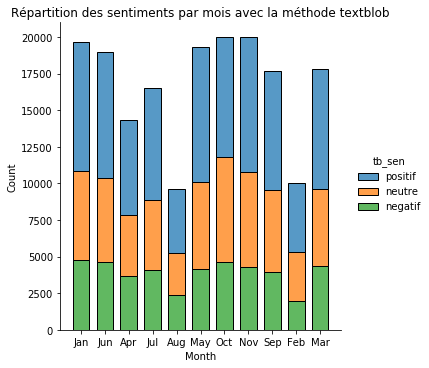

In [32]:
plt.figure(figsize=(30, 20))
cpalette = sns.diverging_palette(140, 10, n=3)
sns.displot(df.sort_values("tb_sen", ascending=False), x="Month", hue="tb_sen", multiple="stack", shrink=0.7)
plt.title("Répartition des sentiments par mois avec la méthode textblob")
plt.show()

Pour tous les mois de l'années, les tweets "positifs" sont les plus représentés suivis des tweets "neutres" et enfin des tweets "négatifs". Cette répartition semble identique d'un mois à l'autre, ce qui suggère une indépendance entre le type de sentiment et le mois de l'année. 

#### Sous Vader


<Figure size 2880x504 with 0 Axes>

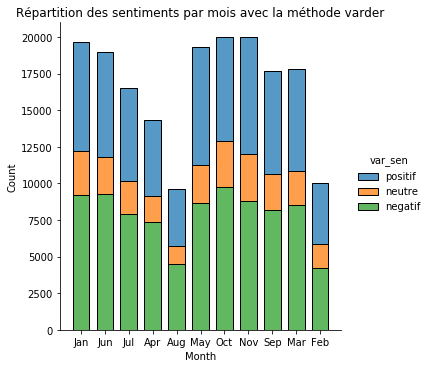

In [33]:
plt.figure(figsize=(40, 7))
cpalette = sns.diverging_palette(140, 10, n=3)
sns.displot(df.sort_values("var_sen", ascending=False), x="Month", hue="var_sen", multiple="stack", shrink=0.7)
plt.title("Répartition des sentiments par mois avec la méthode varder")
plt.show()

Pour tous les mois de l'années, les tweets "positifs" sont les plus représentés suivis des tweets "négatifs" et enfin des tweets "neutres". Cette répartition semble identique d'un mois à l'autre, ce qui suggère une indépendance entre le type de sentiment et le mois de l'année. 

#### *Test d'indépendance du Khi-deux*

Il s'agit d'un test qui compare la distribution des modalités de deux variables qualitatives. L'hypothèse du test est l'indépendance entre les deux variables. Cette hypothèse est testée par le calcul de la statistique de Khi-deux qui utilise les effectifs des groupes formés par l'intersection des modalités des variables. Les valeurs critiques sont tabulées et cette statistque est comparée à ces valeurs. L'hypothèse nulle est rejetée si la statistique calculée est supérieure à la valeur critique correspondante. On peut également utiliser la p-valeur qui est comparée à un seuil de significativité. Dans ce cas, l'hypothèse nulle est rejetée si cette p-valeur est inférieure au seuil. 

In [34]:
cont=pd.crosstab(df["tb_sen"],df["Month"])
khi2, pval , ddl , contingent_theorique = chi2_contingency(cont)
print('statistic: ',khi2, '\nP-value: ',pval ,'\nddl: ', ddl)

def cramers(crosstab):
    chi2 = chi2_contingency(crosstab)[0]
    n = sum(crosstab.sum())
    return np.sqrt(chi2/(n*(min(crosstab.shape)-1)))

statistic:  563.5832604626041 
P-value:  1.3276531709933527e-106 
ddl:  20


In [35]:
cont1=pd.crosstab(df["var_sen"],df["Month"])
khi2, pval , ddl , contingent_theorique = chi2_contingency(cont1)
print('statistic: ',khi2, '\nP-value: ',pval ,'\nddl: ', ddl)

def cramers(crosstab):
    chi2 = chi2_contingency(crosstab)[0]
    n = sum(crosstab.sum())
    return np.sqrt(chi2/(n*(min(crosstab.shape)-1)))

statistic:  561.6182332737721 
P-value:  3.437024699582826e-106 
ddl:  20


### Interprétation :

Au seuil de 5%, la valeur de la p-value nous indique que l'on peut rejetter l'hypothèse d'indépendance entre les mois de l'année et le type de sentiment d'un tweet de ce mois.

Ce résultat était attendu car il se passe chaque mois des événements différents qui vont affecter différemment la côte de popularité d'Emmanuel Macron.

#### On s'intéresse maintenant aux relations pouvant exister entre les autres variables et les sentiments d'un tweet.

###### La variable 'retweet'

In [36]:
df01 = df[df['retweet'] <= 300]

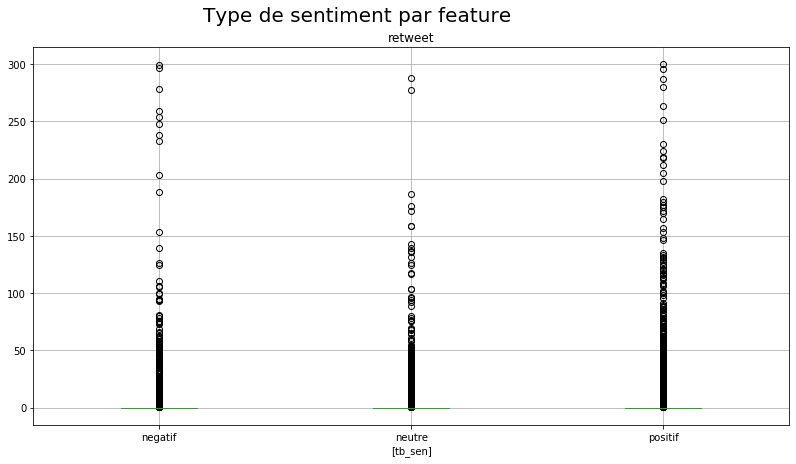

In [37]:
#sentiment par rapport aux autres variables
df1 = df01[["retweet","tb_sen"]]
df1.boxplot(by='tb_sen',figsize=(15,7))
plt.suptitle("Type de sentiment par feature",fontsize=20)
plt.subplots_adjust(left=0.2, wspace=0.2, top=0.9)
plt.show()

## Interprétation :

Ce graphique appelé boite à moustache nous permet de remarquer que les tweets les plus 'retweet' ont tendance à être plutôt positif. C'est la même analyse que l'on a fait pour la variable 'like'. En effet c'est un résultat attendu car en le vérifiant dans la suite, on verra qu'il existe une forte corrélation entre les variables 'like' et 'retweet'.

###### Les variables 'nbre_exclamation', 'nbre_interrogation', 'nbre_htag' et 'nbre_tag'.

In [38]:
df3 = df[df['nbre_exclamation'] <= 25]
df4 = df3[df3['nbre_interrogation'] <= 25]
df5 = df4[df4['nbre_htag'] <= 25]
df6 = df5[df5['nbre_tag'] <= 25]

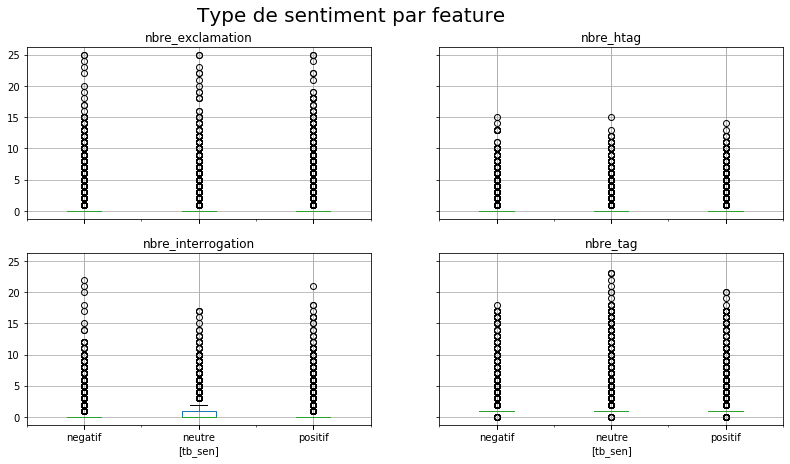

In [39]:
df2 = df6[["tb_sen", "nbre_htag", "nbre_tag", "nbre_exclamation", "nbre_interrogation"]]
df2.boxplot(by='tb_sen',figsize=(15,7))
plt.suptitle("Type de sentiment par feature",fontsize=20)
plt.subplots_adjust(left=0.2, wspace=0.2, top=0.9)
plt.show()

## Interprétation :

Ici, les graphiques ne nous amènent pas à de bonnes conclusions, néanmoins on peut observer que lorsque il y a entre 1 et 3 points  d'interrogations dans le tweet le sentiment peut avoir tendance à être neutre. Cet analyse à du sens, car on pourrait se dire que la personne qui tweet et utilise des points d'interrogations pose une question donc à un avis neutre, où qu'on ne peut pas étudier.

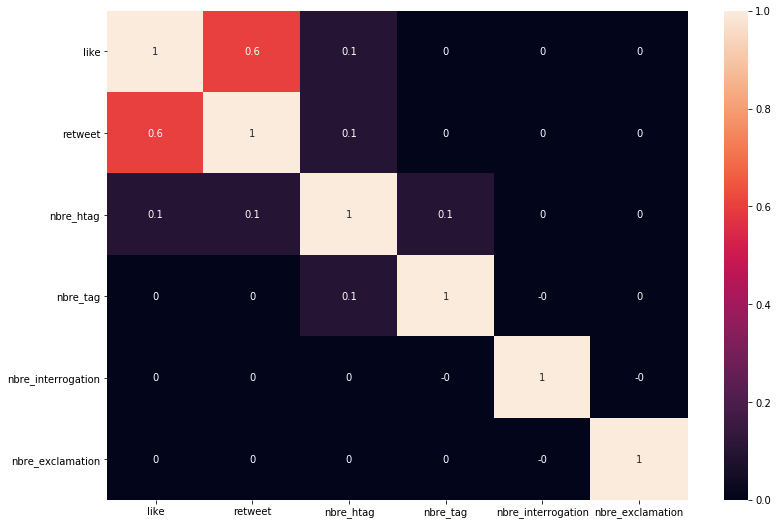

In [40]:
#Matrice de variance covariance
matrice_corr = df[["like", "retweet" , "nbre_htag", "nbre_tag", "nbre_interrogation","nbre_exclamation"]].corr(method='spearman').round(1)
f, ax = plt.subplots(figsize=(13, 9))
sns.heatmap(data=matrice_corr, annot=True, center=None)

#### Interprétation

Comme dit précédemment, ce résultat était attendu, en effet il était attendu qu'on ait une forte corrélation entre les retweets et le nombre de j'aime mais pas avec les autres variables présentes.

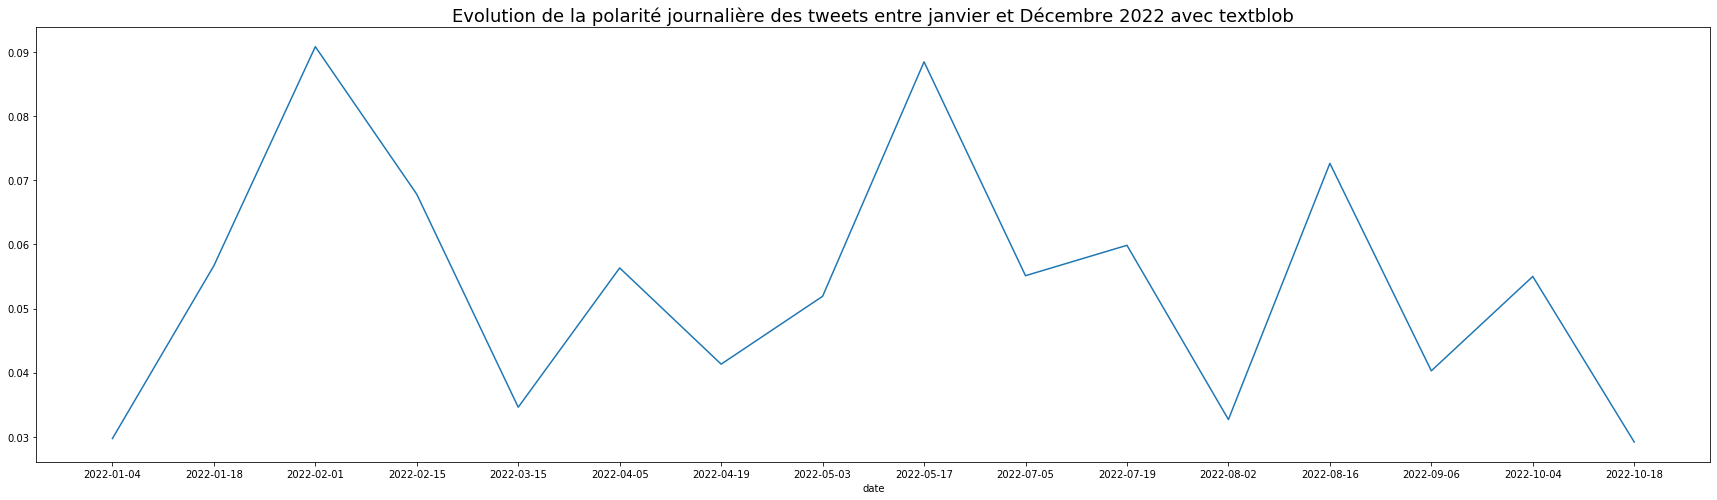

In [41]:
plt.figure(figsize=(30, 8))
plt.xlabel('date')
df1=df[df['day']==1]
df2 = df1[['Date','tb_pol']].groupby('Date').mean()
plt.plot(df2)
plt.title("Evolution de la polarité journalière des tweets entre janvier et Décembre 2022 avec textblob", size=18)
plt.show()

#### Observation :

La polarité varie très peu (entre +0.03 et +0.09) dans ce cas-là et reste toujours positive.


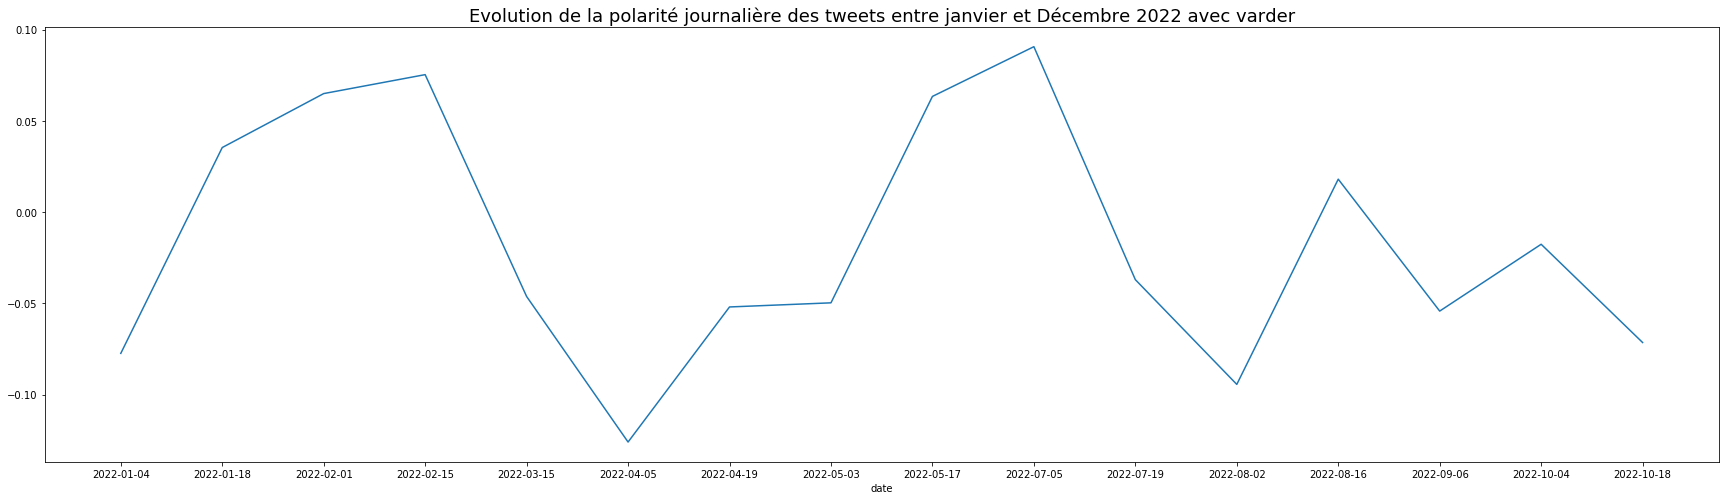

In [42]:
plt.figure(figsize=(30, 8))
plt.xlabel('date')
df1=df[df['day']==1]
df2 = df1[['Date','var_pol']].groupby('Date').mean()
plt.plot(df2)
plt.title("Evolution de la polarité journalière des tweets entre janvier et Décembre 2022 avec varder", size=18)
plt.show()

#### Observation :

En revanche, dans ce cas-là, la polarité fluctue énormément (entre -0.10 et +0.10) en 2022 mais reste en moyenne négative comme on l'a vu précédemment.
On peut donc faire l'hypothèse que Vader va avoir tendance à donner des scores de polarité plus éloigné de 0 que sous Textblob.
C'est à dire que les sentiments sont beaucoup plus négatifs ou positifs que neutre sous Vader.

### Visualisation des mots les plus frequents dans les sentiments  pour chaque mois

In [43]:
#Affichage des wordclouds
import random

def couleur_rouge(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(0, 100%, {random.randint(25, 75)}%)" 

def couleur_verte(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl({random.randint(90, 150)}, 100%, 30%)" 

def couleur_jaune(word, font_size, position, orientation, random_state=None,**kwargs):
    return f"hsl(42, 100%, {random.randint(25, 50)}%)" 

In [44]:

stop_word=['vacciné','vaccin','russe','ukrainien','peuple',
           'Macron','Lola','rouler','president','le','la','energie','chomage',
           'election','retraite','écologique','écologie','climat',
           'faire','vous','aller','cela','France','plus','visage',
           'président','françai','comme','wallet','quand',
           'quoi','dire','vouloir','falloir','pouvoir',
           'devoir','venir','joievisage','être', 
           'Afrique', 'Poutine','alors','Europe','vacciner',
           'Monsieur','pourquoi','français','savoir','avoir',
           'pays','ukraine','poutine','russie','guerre','Arménie','Africain','riantrouler','croix','tout','voir','ciel','latine']


def trace_3_wordclouds_alignes(mots_neg, mots_neu, mots_pos):
    fig, axes = plt.subplots(1,3, figsize=(25,25))
    
    wordcloud_neg = WordCloud(stopwords=stop_word,
                          background_color='white', 
                          collocations=False, collocation_threshold=100,
                          max_words=100, min_word_length=4, colormap='Reds'
                         ).generate(mots_neg)
    axes[0].imshow(wordcloud_neg.recolor(color_func=couleur_rouge, random_state=3), interpolation='bilinear')
    axes[0].set_title("Sentiment négatif", size=20)
    axes[0].axis("off")

    wordcloud_neu = WordCloud(
                          stopwords=stop_word,
                          background_color='white',
                          collocations=False, collocation_threshold=100,
                          max_words=100, min_word_length=4, colormap='Greens'
                         ).generate(mots_neu)
    axes[1].imshow(wordcloud_neu.recolor(color_func=couleur_jaune, random_state=3), interpolation='bilinear')
    axes[1].set_title("Sentiment neutre", size=20)
    axes[1].axis("off")

    wordcloud_pos = WordCloud(
                          stopwords=stop_word,
                          background_color='white', 
                          collocations=False, collocation_threshold=100,
                          max_words=100, min_word_length=4, colormap='Greens'
                         ).generate(mots_pos)
    axes[2].imshow(wordcloud_pos.recolor(color_func=couleur_verte, random_state=3), interpolation='bilinear')
    axes[2].set_title("Sentiment positif", size=20)
    axes[2].axis("off")

    plt.tight_layout()
    plt.show();

In [45]:
def plot_wordcloud(df) :
    for month in df["Month"].unique():
      print("sentiment le mois de {} \n".format(month))
      df_cloud = df[df['Month']==month]
      df_pos = df_cloud[df_cloud['tb_score']==1]['sl_clean']
      mots_pos = ' '.join([str(word) for word in df_pos])
    
      df_neg = df_cloud[df_cloud['tb_score']==-1]['sl_clean']
      mots_neg = ' '.join([str(word) for word in df_neg])
    
      df_neu = df_cloud[df_cloud['tb_score']==0]['sl_clean']
      mots_neu = ' '.join([str(word) for word in df_neu])
    
      trace_3_wordclouds_alignes(mots_neg, mots_neu, mots_pos)


sentiment le mois de Jan 



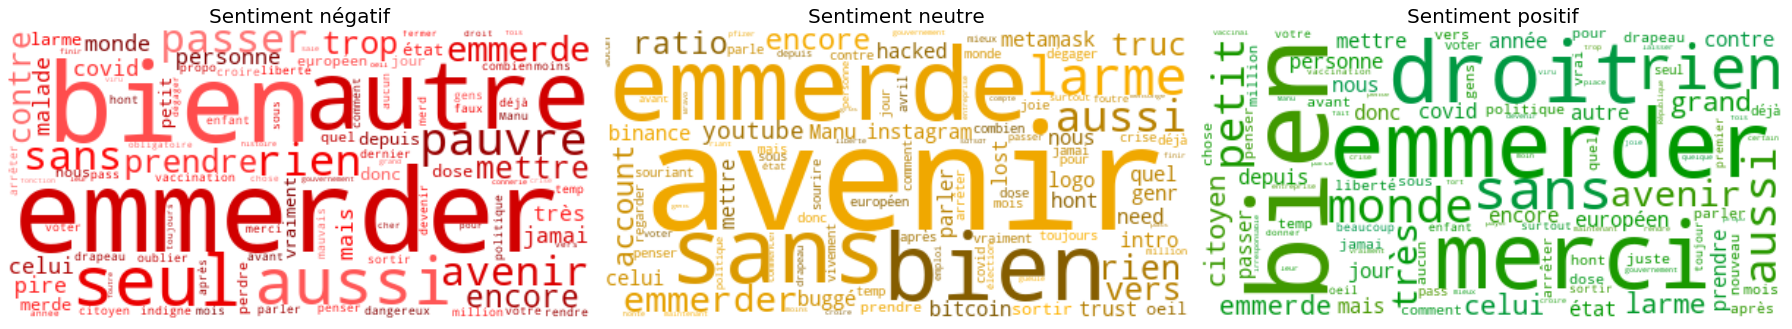

sentiment le mois de Feb 



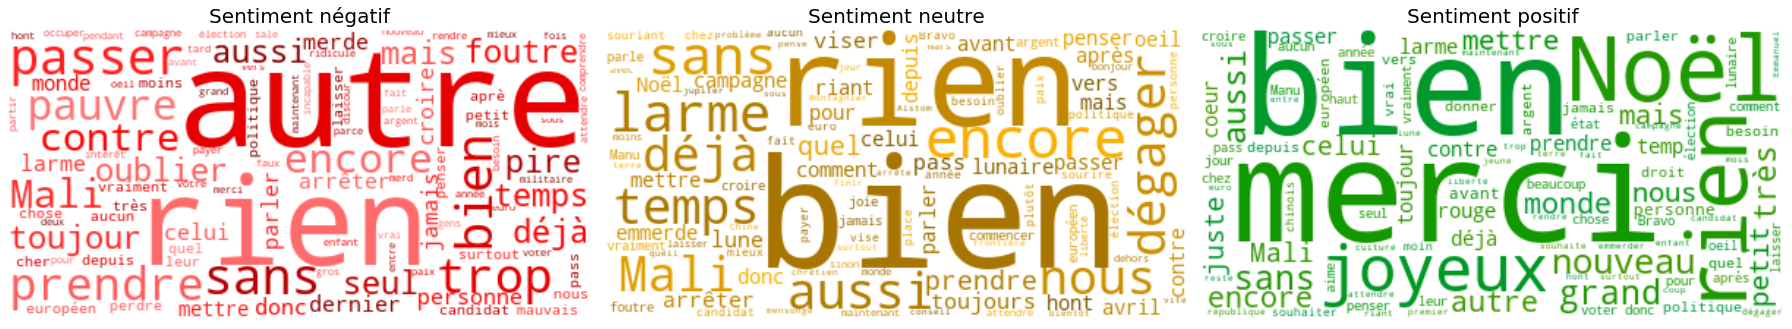

sentiment le mois de Mar 



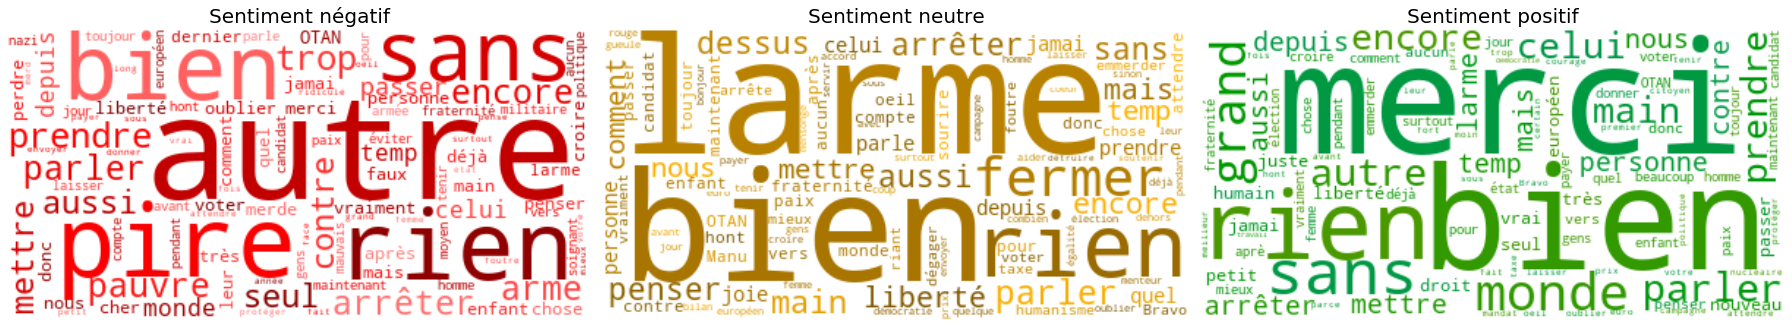

sentiment le mois de Apr 



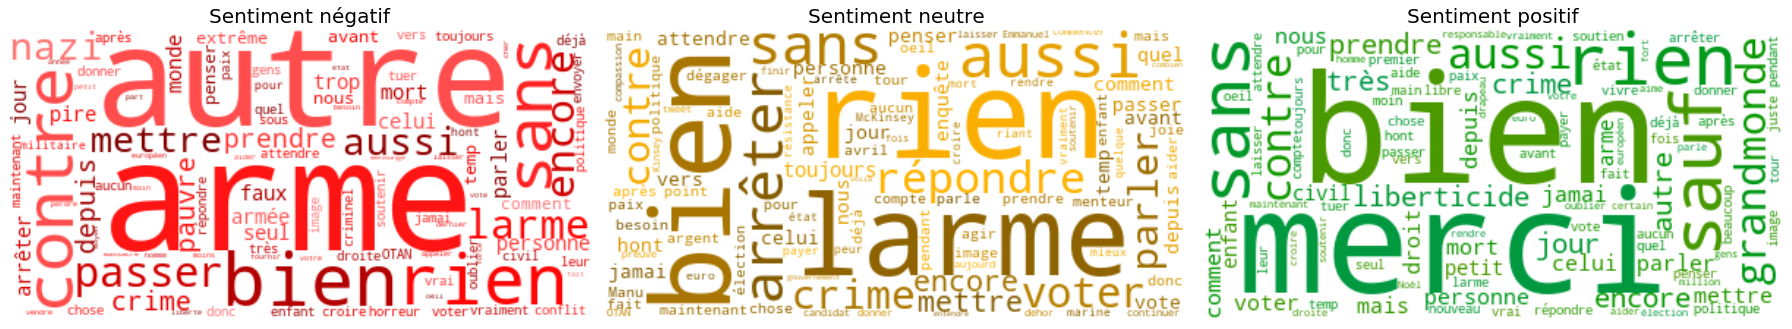

sentiment le mois de May 



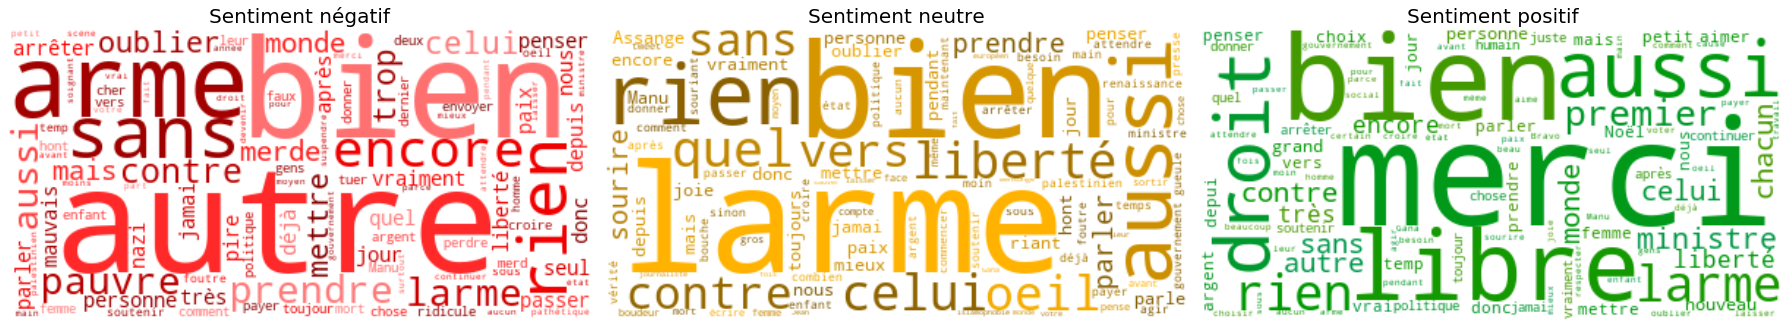

sentiment le mois de Jun 



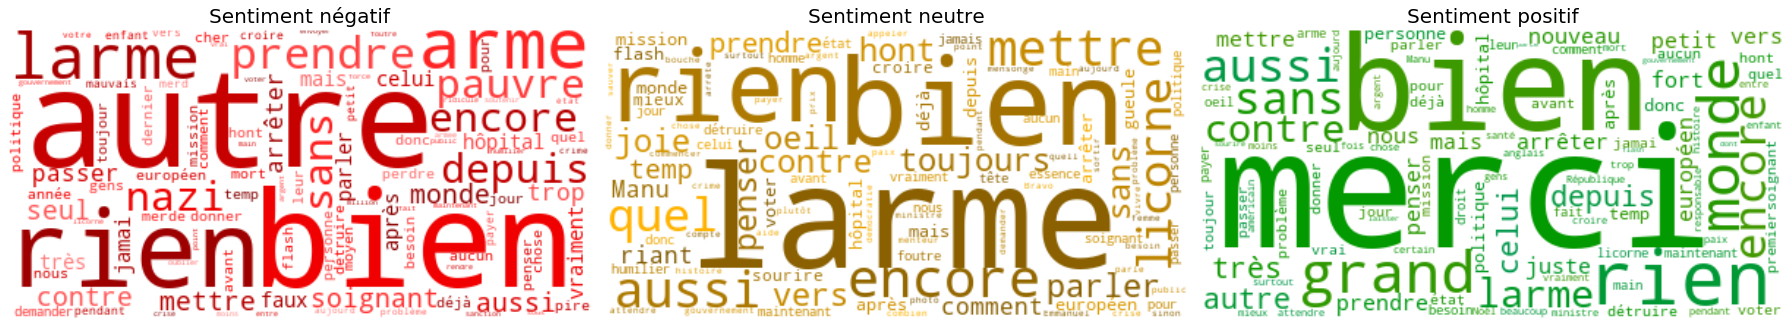

sentiment le mois de Jul 



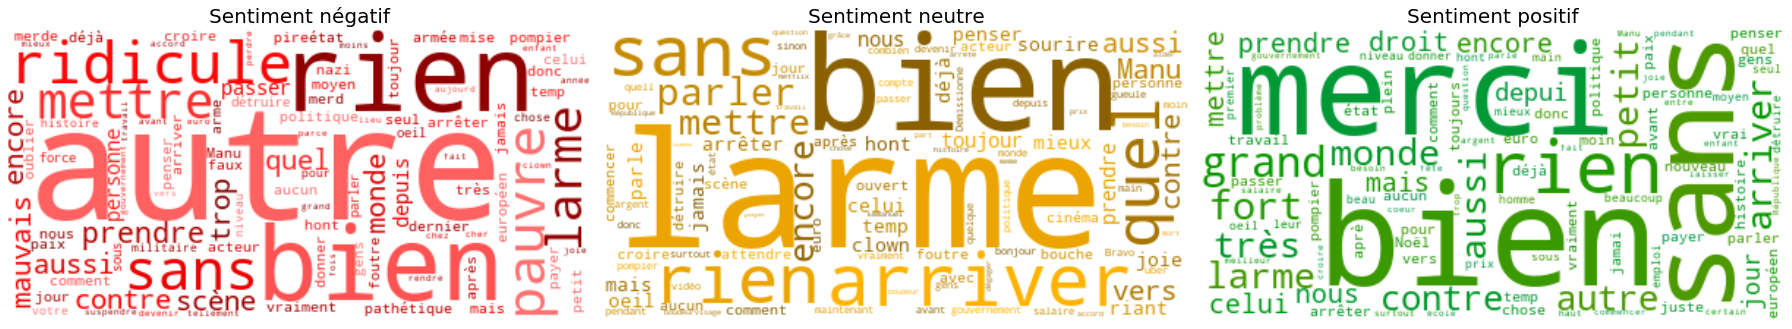

sentiment le mois de Aug 



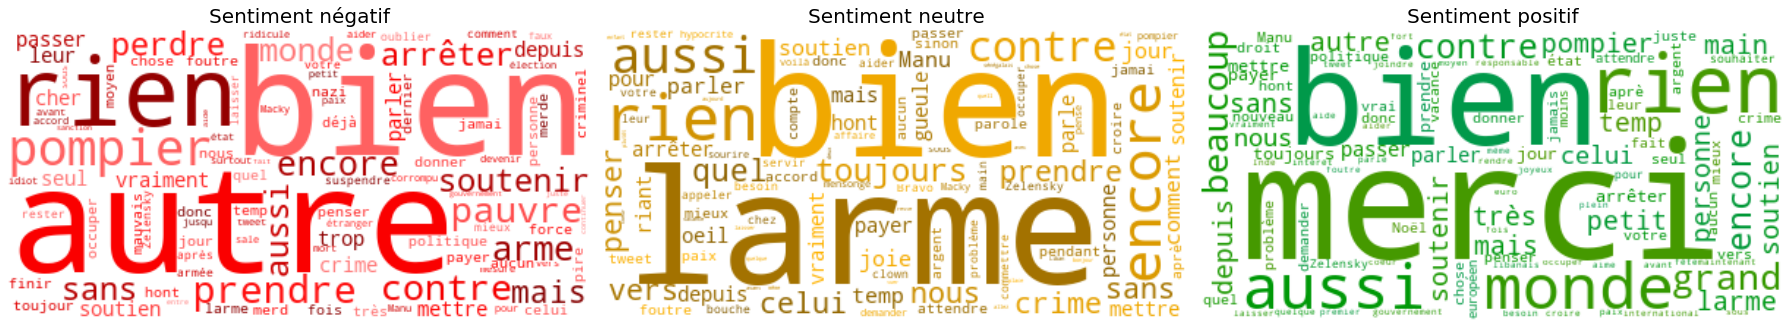

sentiment le mois de Sep 



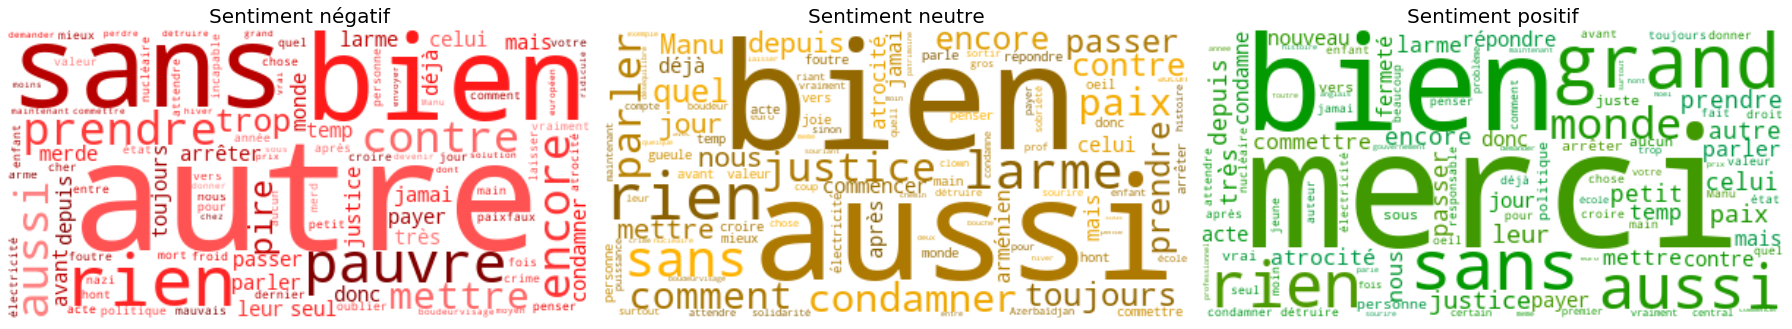

sentiment le mois de Oct 



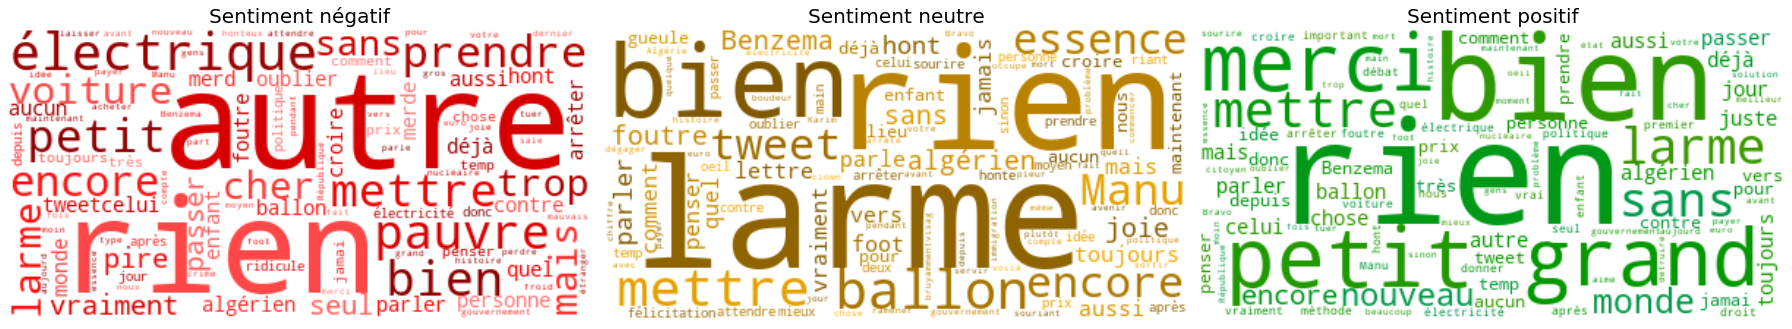

sentiment le mois de Nov 



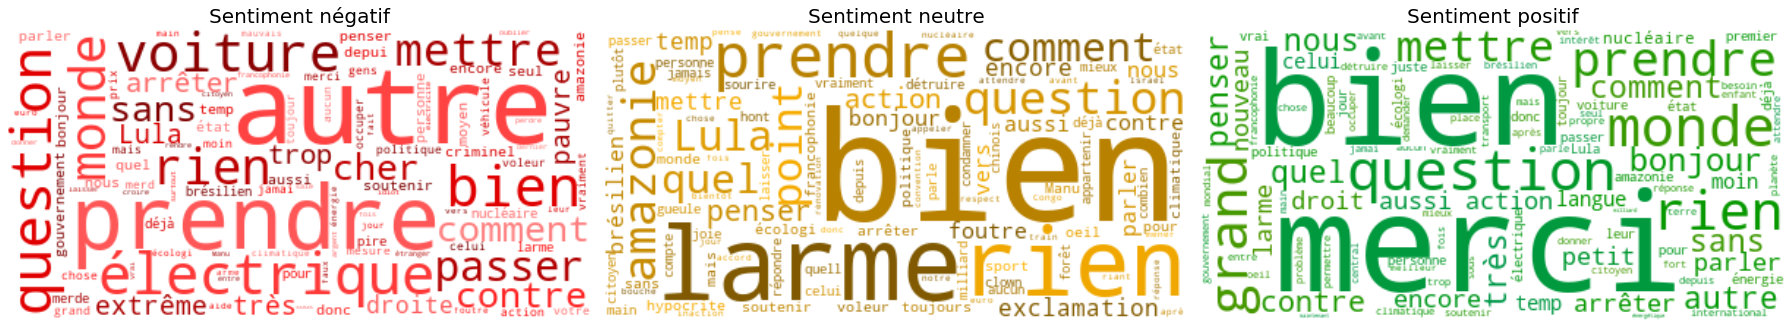

In [46]:
plot_wordcloud(df)

### Evolution de l'opinion moyenne avec textblob

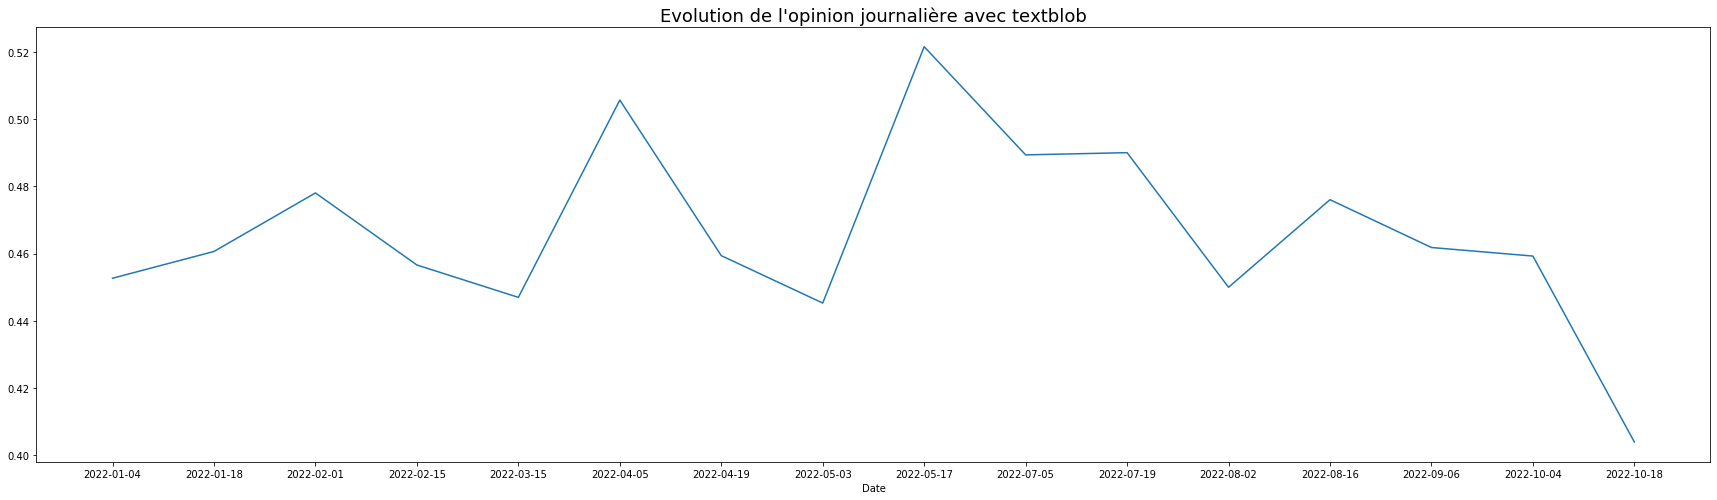

In [47]:
plt.figure(figsize=(30, 8))
plt.xlabel('Date')
df['tb_opinion']=[ 1 if(x==1) else 0 for x in df['tb_score']]
df1=df[df['day']==1]
df2 = df1[['Date','tb_opinion']].groupby('Date').mean()
plt.plot(df2)
plt.title("Evolution de l'opinion journalière avec textblob", size=18)
plt.show()

### Evolution de l'opinion moyenne avec varder

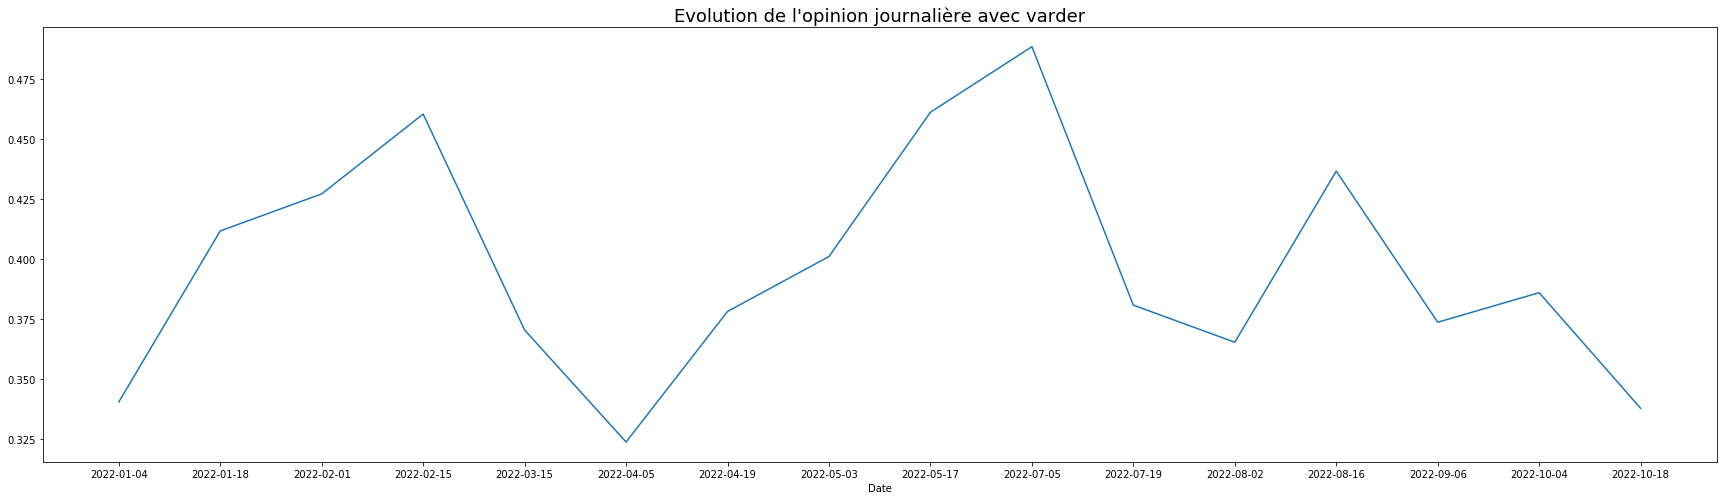

In [48]:
plt.figure(figsize=(30, 8))
plt.xlabel('Date')
df['var_opinion']=[ 1 if(x==1) else 0 for x in df['var_score']]
df1=df[df['day']==1]
df2 = df1[['Date','var_opinion']].groupby('Date').mean()
plt.plot(df2)
plt.title("Evolution de l'opinion journalière avec varder", size=18)
plt.show()

On vous donne ci-dessous le lien d'une vraie étude sur l'évolution de la côte de popularité d'Emmanuel Macron effectuée par le journal Le Point :

Pour y accéder, cliquez sur le lien puis cochez sur tout décocher en dessous du graphique puis cocher un peu plus bad : Emmanuel Macron

https://www.ipsos.com/fr-fr/barometre-politique-ipsos-le-point

On s'intéressera uniquement à la courbe verte qui représente le pourcentage de sentiments positifs.

**Avec textblob** : On trouve des valeurs un peu élevées comparée à la réalité (entre 0.40 et 0.52) alors que dans le journal ça varie entre 0.36 et 0.47 sur la même période. On peut donc voir qu'en moyenne l'analyse de sentiments avec Textblob augmente un peu les pourcentage de sentiments positifs par rapport à la réalité. Cependant on observe dans les deux cas que le mois de Novembre est des mois où sa côte de popularité était au plus faible.
Finalement les fluctuations ne sont pas exactement les mêmes, mais on reste relativement proche des résultats de l'étude réalisée par Le Point, Textblob nous donne des résultats assez concluants.

**Avec Vader** : On trouve ici des valeurs plus faibles (entre 0.325 et 0.48) mais avec une variance plus élevées. Comparées aux données du journal, on trouve ici des valeurs plus proches qu'avec Textblob cependant l'évolution au cours du temps reste différente notamment au mois de mars où Vader prédit le pourcentage le plus faible alors que dans le journal c'est le plus élevé. Cependant on trouve quand même des points de correspondance, notamment en Mai 2022.

##  Polarisation non supervisée en utilisant  Word2vec et Kmeans

Ici on définit un model d'analyse de sentiment non supervisé, on par du principe qu'on ne connaît pas la polarité d'aucun mot et on essaye de la détermier de manière non supervisée. pour cela on procède de la manière suivante:

+ A partir des différents tweets on crée notre vocabulaire de mots qu'on va transformer ensuite en vecteur grâce a word2vec(pour plus de précision regarder le fichier w2v/word2vec/embedding.ipynb)

+ Ensuite avec notre modélisation des mots en vecteur on va effectuer une classification non supervisée en l'occurence ici les kmeans qui va permettre d'identifier les 2 cluster correspondants au sentiment positif et négatif caractérisé respectivement par le score 1 et -1, la polarité sera déterminé en pondérant par rapport à la distance au centre du cluster(pour plus de précision regarder le fichier w2v/kmeans/kmeans.ipynb)

+ Pour déterminer la polarité d'une phrase , on la découpera en ses différents mots et la polarité sera la somme des polarités de chaque mot pondérées par TfidfVectorizer qui  s'obtient en jouant sur la frequence d'un mot dans les différents tweets

+ Ainsi on deduit le sentiment d'une phrase 1 si la polarité est positive et -1 sinon

+ Pour l'opinion : 1 si la polarité est positive et 0 sinon


In [49]:
#Nouveau modèle

sentiment_map = pd.read_csv("w2v/kmeans/dict_sentiment.csv")
sentiment_dict = dict(zip(sentiment_map.words.values, sentiment_map.sentiment_coeff.values))

def get_ifidf_for_words(tfidf,tweet,feature_names):
    tfidf_matrix= tfidf.transform([tweet]).todense()
    feature_index = tfidf_matrix[0,:].nonzero()[1]
    tfidf_scores = zip([feature_names[i] for i in feature_index], [tfidf_matrix[0, x] for x in feature_index])
    dictionary= dict(tfidf_scores)
    return (lambda x: list(map(lambda y: replace_sentiment_words(y, dictionary), x.split())))(tweet)
    
def get_ifidf_for_words(tfidf,tweet,feature_names):
    tfidf_matrix= tfidf.transform([tweet]).todense()
    feature_index = tfidf_matrix[0,:].nonzero()[1]
    tfidf_scores = zip([feature_names[i] for i in feature_index], [tfidf_matrix[0, x] for x in feature_index])
    dictionary= dict(tfidf_scores)
    return (lambda x: list(map(lambda y: replace_sentiment_words(y, dictionary), x.split())))(tweet)

def replace_sentiment_words(word, sentiment_dict):
    try:
        out = sentiment_dict[word]
    except KeyError:
        out = 0
    return out
    
def evolution(df):
  opinion=[]
  nbre_opinion=pd.DataFrame({"mois":[],"sentiment":[]})
  tweets=df['sl_clean'].copy()
  tweets=tweets.astype('str')
  tweets=pd.DataFrame([tweet.encode('utf-8').decode() for tweet in tweets]).squeeze()


    
  tfidf = TfidfVectorizer()
  tfidf.fit(tweets)
  feature_names = tfidf.get_feature_names()
    
  replaced_tfidf_scores=tweets.apply(lambda tweet : get_ifidf_for_words(tfidf,tweet,feature_names))
    
  replaced_closeness_scores = tweets.apply(lambda x: list(map(lambda y: replace_sentiment_words(y, sentiment_dict), x.split())))

  replacement_df = pd.DataFrame(data=[replaced_closeness_scores, replaced_tfidf_scores, tweets]).T
  replacement_df.columns = ['sentiment_coeff', 'tfidf_scores', 'sentence']
  replacement_df['sentiment_rate'] = replacement_df.apply(lambda x: np.array(x.loc['sentiment_coeff']) @ np.array(x.loc['tfidf_scores']), axis=1)
  replacement_df['sentiment_rate'] = [1 if i>0 else 0 for i in replacement_df['sentiment_rate']]
  replacement_df['sentiment'] = ["positive" if i==1 else "negative" for i in replacement_df['sentiment_rate']]

  df['w2v_score']=replacement_df['sentiment_rate']
  df['w2v_sen']=replacement_df['sentiment']


In [50]:
evolution(df)

####  Repartition des sentiments par mois

<Figure size 2160x1440 with 0 Axes>

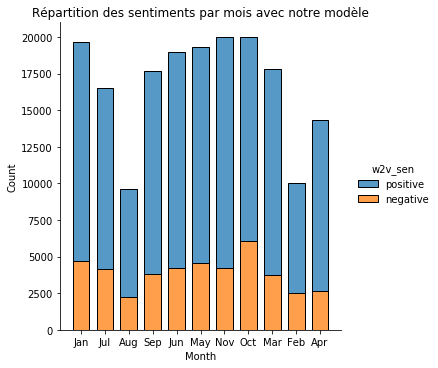

In [51]:
plt.figure(figsize=(30, 20))
cpalette = sns.diverging_palette(140, 10, n=3)
sns.displot(df.sort_values("w2v_sen", ascending=False), x="Month", hue="w2v_sen", multiple="stack", shrink=0.7)
plt.title("Répartition des sentiments par mois avec notre modèle")
plt.show()

#### Evolution de l'opinion

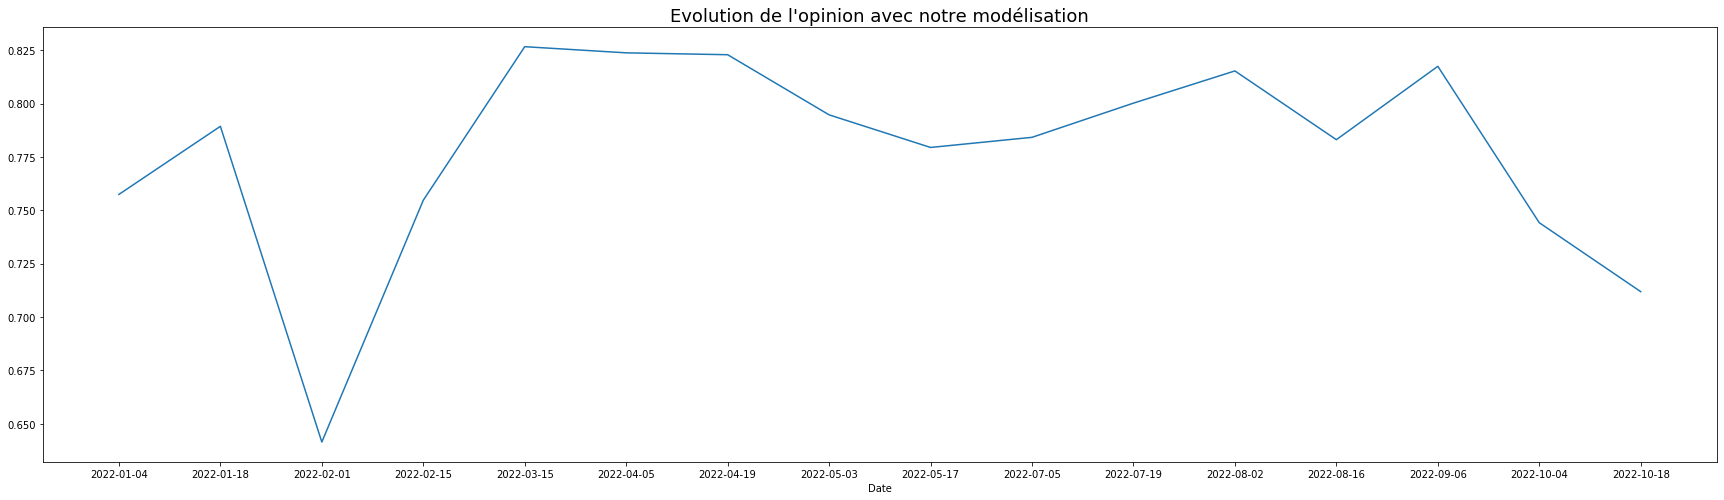

In [52]:
plt.figure(figsize=(30, 8))
plt.xlabel('Date')
df1=df[df['day']==1]
df2 = df1[['Date','w2v_score']].groupby('Date').mean()
plt.plot(df2)
plt.title("Evolution de l'opinion avec notre modélisation", size=18)
plt.show()

### Remarque:

+ L'opinion sur le président en utilisant ce modèle donne des opinions très positives (un minimum autour de 0.63)  par rapport à ceux tracés avec les méthodes de varder et textblot.
+ Ceci peut être du à la proximité des cluster lors de l'application de la méthode des kmeans, car plus ils sont proches plus les mots negatifs auront tendance à répresenter les positifs et inversement ce qui ne reflète plus la réalité.

+ Toutefois la courbe semble suivre une tendance similaire aux  2 précédentes entre juillet et décembre, une augmentation du nombre de données aurait peut-être permise de se rapprocher encore un peu plus de la réalité.

## Prédiction des sentiments

Intéressons nous à la prédiction des sentiments par rapports aux différents features 'like', 'retweet', 'nbre 'nbre_exclamation', 'nbre_interrogation'. on s'intérèsse uniquement à ces dernières car ce sont elles qui semblaient pouvoir expliquer  la nature d'un tweet.

#### On commence d'abord par créer un Dataset homogène avec le même nombre de tweets positifs, négatifs et neutres.

In [53]:
###partie classification
# Création d'un dataframe qui équilibre les tweets par label (même nobre de tweets pour chaque label) par tirage aléatoire
df_class = df[['tb_score','like', 'retweet', 'nbre_htag', 'nbre_tag', 'nbre_exclamation', 'nbre_interrogation']]

positif = df_class[df['tb_score']==1]

neutre = df_class[df['tb_score']==0]

negatif = df_class[df['tb_score']==-1]

taille=min(df["tb_score"].groupby(df["tb_score"]).count())
A = positif.sample(n=taille, 
                   frac=None,
                   replace=False,
                   weights=None,
                   random_state=None,
                   axis=None)

B= neutre.sample(n=taille, 
                  frac=None,
                  replace=False,
                  weights=None,
                  random_state=None,
                  axis=None)
C= negatif.sample(n=taille, 
                  frac=None,
                  replace=False,
                  weights=None,
                  random_state=None,
                  axis=None)

base_model = pd.concat([A, B, C], ignore_index=True)



#### On sépare les données en données de test et d'entraînement , constitué  respectivement de 20% et 80%  du Dataset initial.

In [54]:
#creation des données de test et entraînement
X_train, X_test, y_train, y_test = train_test_split(base_model[['like', 'retweet', 'nbre_htag', 'nbre_tag', 'nbre_exclamation', 'nbre_interrogation']],base_model['tb_score'],
                     test_size=0.2)
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))


103176
25794
103176
25794


### Le support vector Machine  
C'est un modèle de classification supervisée qui permet de diviser l'espace à l'aide d'hyperplans et de déterminer ainsi les différentes zones de classifications.  Dans notre cas on l'appliquera uniquement sur 10000 données  car au vu de sa  complexité , il prend beaucoup de temps à s'executer

In [55]:
###Support Vector Machine
classifier = SVC(kernel ='linear', random_state = 0)
X_svm_train=X_train[:10000]
y_svm_train=y_train[:10000]
classifier.fit(X_svm_train, y_svm_train)
X_svm_test=X_test[:10000]
y_pred = classifier.predict(X_svm_test)
y_svm_test=y_test[:10000]


In [56]:
matrice_confusion = pd.DataFrame(confusion_matrix(y_svm_test, y_pred), index=["Negatif", "Neutre", "Positif"], columns=["predicted_negatif", "predicted_neutre", "predicted_positif"])
matrice_confusion

predicted_negatif  predicted_neutre  predicted_positif
Negatif                282              2815                215
Neutre                 198              3050                129
Positif                254              2851                206

La matrice de confusion ci-dessus montre que sur 3312 tweets négatifs passés en test,  seulement 282 sont effectivement prédits négatifs. 3050 neutres sur 3377 sont effectivement prédits neutres et seulement 206 positifs sur 3311 sont effectivement classés positifs par le modèle.

In [57]:
print(classification_report(y_svm_test, y_pred))

              precision    recall  f1-score   support

          -1       0.38      0.09      0.14      3312
           0       0.35      0.90      0.50      3377
           1       0.37      0.06      0.11      3311

    accuracy                           0.35     10000
   macro avg       0.37      0.35      0.25     10000
weighted avg       0.37      0.35      0.25     10000



#### Précision:
représente la sensibilté qui est le taux de bon classement des tweets au sein d'un type de sentiment réel donné. Par exemple, pour la modalité négatif, 38 % des tweets réellement négatifs sont bien classés.
#### Recall:
recall fait référence à la spécificité qui renvoie au taux de bon classement des tweets au sein d'un type de sentiment prédit donné. Par exemple, pour les modalités neutre 35% des tweets prédits neutres sont bien classés. 
#### Accuracy:
accuracy fait référence au taux de bon classement des tweets.

### les K-Nearest Neighbors

C'est un modèle de classification supervisé qui determine le label d'une donnée, en identifiant le label le plus representé parmis ces k plus proches voisin. on l'appliquera en prenant k =10.

In [58]:
#knn
knn = KNeighborsClassifier(n_neighbors=10) 
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test) 


#### Matrice de confusion

In [59]:
matrice_confusion = pd.DataFrame(confusion_matrix(y_test, y_pred), index=["Negatif", "Neutre", "Positif"], columns=["predicted_negatif", "predicted_neutre", "predicted_positif"])
matrice_confusion

predicted_negatif  predicted_neutre  predicted_positif
Negatif               2685              4308               1467
Neutre                2641              4810               1208
Positif               2621              4529               1525

La matrice de confusion ci-dessus montre que sur 8640 tweets négatifs passés en test,  2685 sont effectivement prédits négatifs. Aussi, 4810 sentiments neutres sur 8659 sont effectivement prédits neutres et 1525 sentiments positifs sur 8675 sont effectivement classés positifs par le modèle.



In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.34      0.32      0.33      8460
           0       0.35      0.56      0.43      8659
           1       0.36      0.18      0.24      8675

    accuracy                           0.35     25794
   macro avg       0.35      0.35      0.33     25794
weighted avg       0.35      0.35      0.33     25794



L'accuracy des 2 classifieurs est plutot faible pour prédire les sentiments des différents tweets à partir des features 'like', 'retweet', 'nbre 'nbre_exclamation', 'nbre_interrogation'. On pourrait augmenter le nombre de voisins k, mais cet hyperparamètre s'il est mal controlé peut conduire au overfitting.